# Data Prep


 Author: Brandon Sienkiewicz

---

The first steps in order to work with the data are to import the relevant packages and read in the data. This requires numpy, pandas, sklearn, and imblearn. Once the data has been read in, it is useful to look at the first five entries in each dataset.

In [85]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE

In [5]:
base = pd.read_csv('../Data/Base.csv')
var1 = pd.read_csv('../Data/Variant I.csv')
var2 = pd.read_csv('../Data/Variant II.csv')
var3 = pd.read_csv('../Data/Variant III.csv')
var4 = pd.read_csv('../Data/Variant IV.csv')
var5 = pd.read_csv('../Data/Variant V.csv')

In [6]:
base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [7]:
var1.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.252681,-1,188,20,0.021614,-0.266603,AC,2596,...,0,1000.0,1,INTERNET,7.634858,linux,0,1,0,5
1,0,0.9,0.185206,-1,51,30,0.001696,-1.191015,AD,898,...,0,1500.0,0,INTERNET,5.408299,other,0,1,0,4
2,0,0.1,0.505509,-1,187,20,0.011880,-1.252679,AB,2851,...,0,500.0,0,INTERNET,9.401087,linux,1,1,0,5
3,0,0.2,0.612030,-1,55,20,0.001582,-3.001035,AA,4035,...,0,200.0,0,INTERNET,4.165579,linux,0,1,0,1
4,0,0.4,0.592596,319,68,30,0.011189,-0.729188,AB,1611,...,0,200.0,1,INTERNET,8.971943,linux,0,1,0,5


In [8]:
var2.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.7,0.123474,-1,149,30,0.027608,21.599012,AA,1034,...,0,200.0,0,INTERNET,14.851445,other,0,1,0,4
1,0,0.8,0.166159,-1,97,50,0.015207,-1.136921,AB,1371,...,0,200.0,0,INTERNET,9.873092,windows,1,1,0,5
2,0,0.6,0.328567,-1,165,50,0.039634,24.077611,AA,1451,...,1,200.0,0,INTERNET,9.318093,linux,0,1,0,0
3,0,0.7,0.503447,-1,201,50,0.011845,-0.766643,AC,1034,...,1,200.0,0,INTERNET,59.810853,windows,1,1,0,1
4,0,0.4,0.339627,-1,61,50,0.001281,-0.938068,AB,1206,...,0,200.0,0,INTERNET,19.851689,windows,0,1,0,2


In [9]:
var3.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,0,0.2,0.369510,326,20,60,0.022212,-0.758101,AB,647,...,0,INTERNET,19.450933,other,1,2,0,3,-0.282223,-0.137122
1,0,0.6,0.858929,-1,154,50,0.038221,-0.781645,AB,1238,...,0,INTERNET,3.641099,windows,1,1,0,5,-0.145247,1.614553
2,0,0.9,0.166457,-1,41,50,0.002588,17.710636,AA,815,...,0,INTERNET,3.850864,macintosh,0,1,0,4,-0.029179,1.089166
3,0,0.8,0.250290,23,9,50,0.004026,18.224113,AA,1204,...,0,INTERNET,5.182197,windows,1,1,0,2,2.178365,1.301696
4,0,0.1,0.619087,-1,30,30,0.011687,-1.434154,AB,1182,...,0,INTERNET,4.346861,windows,1,1,0,7,1.472099,0.367675


In [10]:
var4.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.8,0.854789,-1,367,70,0.002221,43.264018,AA,785,...,1,200.0,0,INTERNET,7.256475,other,0,1,0,5
1,0,0.8,0.906272,44,0,20,8.326632,-1.316227,AD,1614,...,0,200.0,0,INTERNET,23.099668,other,1,1,0,0
2,0,0.6,0.152537,-1,44,30,0.003582,15.954219,AA,1890,...,1,500.0,0,INTERNET,4.662904,other,0,1,0,4
3,0,0.9,0.377427,-1,35,50,0.015738,-1.284274,AB,905,...,0,200.0,0,INTERNET,4.164272,windows,0,1,0,4
4,0,0.9,0.235135,54,17,30,20.539897,37.741422,AA,1586,...,0,200.0,0,INTERNET,6.035516,other,1,1,0,0


In [11]:
var5.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,0,0.1,0.054656,-1,55,50,0.029642,-0.779957,AB,1735,...,0,INTERNET,5.063178,linux,0,1,0,2,-0.833286,-0.239018
1,0,0.2,0.516874,-1,178,50,0.036917,-0.471011,AB,910,...,0,INTERNET,5.403648,linux,0,1,0,3,-0.044042,1.174898
2,0,0.1,0.870572,-1,26,30,11.838249,51.068616,AA,1730,...,0,INTERNET,6.701977,linux,1,1,0,2,2.094070,0.643121
3,0,0.1,0.234248,29,9,20,0.030793,16.341333,AA,533,...,0,INTERNET,12.787474,linux,1,1,0,7,-1.060523,0.285319
4,0,0.2,0.909504,11,5,30,0.036117,-1.151589,AB,2935,...,0,INTERNET,4.670977,linux,0,1,0,2,1.989430,-0.803668


---

In order to get a better understanding of the data in each column, a simnple for loop was created which prints out the unique values in each column. Based on the values, it is simple to determine if a column is binary, categorical, or numerical.

In [12]:
for column in base:
    print('{}: {} unique values'.format(column, len(base[column].unique())))

fraud_bool: 2 unique values
income: 9 unique values
name_email_similarity: 998861 unique values
prev_address_months_count: 374 unique values
current_address_months_count: 423 unique values
customer_age: 9 unique values
days_since_request: 989330 unique values
intended_balcon_amount: 994971 unique values
payment_type: 5 unique values
zip_count_4w: 6306 unique values
velocity_6h: 998687 unique values
velocity_24h: 998940 unique values
velocity_4w: 998318 unique values
bank_branch_count_8w: 2326 unique values
date_of_birth_distinct_emails_4w: 40 unique values
employment_status: 7 unique values
credit_risk_score: 551 unique values
email_is_free: 2 unique values
housing_status: 7 unique values
phone_home_valid: 2 unique values
phone_mobile_valid: 2 unique values
bank_months_count: 33 unique values
has_other_cards: 2 unique values
proposed_credit_limit: 12 unique values
foreign_request: 2 unique values
source: 2 unique values
session_length_in_minutes: 994887 unique values
device_os: 5 uniqu

In [13]:
for column in var1:
    print('{}: {} unique values'.format(column, len(base[column].unique())))

fraud_bool: 2 unique values
income: 9 unique values
name_email_similarity: 998861 unique values
prev_address_months_count: 374 unique values
current_address_months_count: 423 unique values
customer_age: 9 unique values
days_since_request: 989330 unique values
intended_balcon_amount: 994971 unique values
payment_type: 5 unique values
zip_count_4w: 6306 unique values
velocity_6h: 998687 unique values
velocity_24h: 998940 unique values
velocity_4w: 998318 unique values
bank_branch_count_8w: 2326 unique values
date_of_birth_distinct_emails_4w: 40 unique values
employment_status: 7 unique values
credit_risk_score: 551 unique values
email_is_free: 2 unique values
housing_status: 7 unique values
phone_home_valid: 2 unique values
phone_mobile_valid: 2 unique values
bank_months_count: 33 unique values
has_other_cards: 2 unique values
proposed_credit_limit: 12 unique values
foreign_request: 2 unique values
source: 2 unique values
session_length_in_minutes: 994887 unique values
device_os: 5 uniqu

In [14]:
for column in var2:
    print('{}: {} unique values'.format(column, len(base[column].unique())))

fraud_bool: 2 unique values
income: 9 unique values
name_email_similarity: 998861 unique values
prev_address_months_count: 374 unique values
current_address_months_count: 423 unique values
customer_age: 9 unique values
days_since_request: 989330 unique values
intended_balcon_amount: 994971 unique values
payment_type: 5 unique values
zip_count_4w: 6306 unique values
velocity_6h: 998687 unique values
velocity_24h: 998940 unique values
velocity_4w: 998318 unique values
bank_branch_count_8w: 2326 unique values
date_of_birth_distinct_emails_4w: 40 unique values
employment_status: 7 unique values
credit_risk_score: 551 unique values
email_is_free: 2 unique values
housing_status: 7 unique values
phone_home_valid: 2 unique values
phone_mobile_valid: 2 unique values
bank_months_count: 33 unique values
has_other_cards: 2 unique values
proposed_credit_limit: 12 unique values
foreign_request: 2 unique values
source: 2 unique values
session_length_in_minutes: 994887 unique values
device_os: 5 uniqu

In [15]:
for column in var3.drop(['x1', 'x2'], axis=1):
    print('{}: {} unique values'.format(column, len(base[column].unique())))

fraud_bool: 2 unique values
income: 9 unique values
name_email_similarity: 998861 unique values
prev_address_months_count: 374 unique values
current_address_months_count: 423 unique values
customer_age: 9 unique values
days_since_request: 989330 unique values
intended_balcon_amount: 994971 unique values
payment_type: 5 unique values
zip_count_4w: 6306 unique values
velocity_6h: 998687 unique values
velocity_24h: 998940 unique values
velocity_4w: 998318 unique values
bank_branch_count_8w: 2326 unique values
date_of_birth_distinct_emails_4w: 40 unique values
employment_status: 7 unique values
credit_risk_score: 551 unique values
email_is_free: 2 unique values
housing_status: 7 unique values
phone_home_valid: 2 unique values
phone_mobile_valid: 2 unique values
bank_months_count: 33 unique values
has_other_cards: 2 unique values
proposed_credit_limit: 12 unique values
foreign_request: 2 unique values
source: 2 unique values
session_length_in_minutes: 994887 unique values
device_os: 5 uniqu

In [16]:
for column in var4:
    print('{}: {} unique values'.format(column, len(base[column].unique())))

fraud_bool: 2 unique values
income: 9 unique values
name_email_similarity: 998861 unique values
prev_address_months_count: 374 unique values
current_address_months_count: 423 unique values
customer_age: 9 unique values
days_since_request: 989330 unique values
intended_balcon_amount: 994971 unique values
payment_type: 5 unique values
zip_count_4w: 6306 unique values
velocity_6h: 998687 unique values
velocity_24h: 998940 unique values
velocity_4w: 998318 unique values
bank_branch_count_8w: 2326 unique values
date_of_birth_distinct_emails_4w: 40 unique values
employment_status: 7 unique values
credit_risk_score: 551 unique values
email_is_free: 2 unique values
housing_status: 7 unique values
phone_home_valid: 2 unique values
phone_mobile_valid: 2 unique values
bank_months_count: 33 unique values
has_other_cards: 2 unique values
proposed_credit_limit: 12 unique values
foreign_request: 2 unique values
source: 2 unique values
session_length_in_minutes: 994887 unique values
device_os: 5 uniqu

In [17]:
for column in var5.drop(['x1', 'x2'], axis=1):
    print('{}: {} unique values'.format(column, len(base[column].unique())))

fraud_bool: 2 unique values
income: 9 unique values
name_email_similarity: 998861 unique values
prev_address_months_count: 374 unique values
current_address_months_count: 423 unique values
customer_age: 9 unique values
days_since_request: 989330 unique values
intended_balcon_amount: 994971 unique values
payment_type: 5 unique values
zip_count_4w: 6306 unique values
velocity_6h: 998687 unique values
velocity_24h: 998940 unique values
velocity_4w: 998318 unique values
bank_branch_count_8w: 2326 unique values
date_of_birth_distinct_emails_4w: 40 unique values
employment_status: 7 unique values
credit_risk_score: 551 unique values
email_is_free: 2 unique values
housing_status: 7 unique values
phone_home_valid: 2 unique values
phone_mobile_valid: 2 unique values
bank_months_count: 33 unique values
has_other_cards: 2 unique values
proposed_credit_limit: 12 unique values
foreign_request: 2 unique values
source: 2 unique values
session_length_in_minutes: 994887 unique values
device_os: 5 uniqu

---

For this project, the original protected attribute, `customer_age` will be used. In order to utilize customer age effectively, it was split into a binary variable, over the age of 50, 1, or under the age of 50, 0. Each dataset has a slightly different distribution of this category as can be seen below.

In [18]:
pd.options.mode.chained_assignment = None 

base['customer_age'].loc[base.customer_age <= 50] = 0
base['customer_age'].loc[base.customer_age > 50] =1

base.customer_age.value_counts()

0    957340
1     42660
Name: customer_age, dtype: int64

In [19]:
pd.options.mode.chained_assignment = None 

var1['customer_age'].loc[var1.customer_age <= 50] = 0
var1['customer_age'].loc[var1.customer_age > 50] =1

var1.customer_age.value_counts()

0    975354
1     24646
Name: customer_age, dtype: int64

In [20]:
pd.options.mode.chained_assignment = None 

var2['customer_age'].loc[var2.customer_age <= 50] = 0
var2['customer_age'].loc[var2.customer_age > 50] =1

var2.customer_age.value_counts()

0    876754
1    123246
Name: customer_age, dtype: int64

In [21]:
pd.options.mode.chained_assignment = None 

var3['customer_age'].loc[var3.customer_age <= 50] = 0
var3['customer_age'].loc[var3.customer_age > 50] =1

var3.customer_age.value_counts()

0    877300
1    122700
Name: customer_age, dtype: int64

In [22]:
pd.options.mode.chained_assignment = None 

var4['customer_age'].loc[var4.customer_age <= 50] = 0
var4['customer_age'].loc[var4.customer_age > 50] =1

var4.customer_age.value_counts()

0    877021
1    122979
Name: customer_age, dtype: int64

In [23]:
pd.options.mode.chained_assignment = None 

var5['customer_age'].loc[var5.customer_age <= 50] = 0
var5['customer_age'].loc[var5.customer_age > 50] =1

var5.customer_age.value_counts()

0    877291
1    122709
Name: customer_age, dtype: int64

The information regarding the occurence of fraud over the age of 50 is pertinent to the overall analysis; therefore, a plot was created in order to show the proportions for presentation purposes. First, variables for the percentages of fraud over 50 are instantiated. Then, this information is used to create a visualization.

In [41]:
base_fraud_over50 = len(base.customer_age \
                        .loc[(base.fraud_bool == 1) & \
                             (base.customer_age == 1)]) \
/len(base.loc[base.customer_age == 1])

In [42]:
var1_fraud_over50 = len(var1.customer_age \
                        .loc[(var1.fraud_bool == 1) & \
                             (var1.customer_age == 1)]) \
/len(var1.loc[var1.customer_age == 1])

In [43]:
var2_fraud_over50 = len(var2.customer_age \
                        .loc[(var2.fraud_bool == 1) & \
                             (var2.customer_age == 1)]) \
/len(var2.loc[var2.customer_age == 1])

In [44]:
var3_fraud_over50 = len(var3.customer_age \
                        .loc[(var3.fraud_bool == 1) & \
                             (var3.customer_age == 1)]) \
/len(var3.loc[var3.customer_age == 1])

In [45]:
var4_fraud_over50 = len(var4.customer_age \
                        .loc[(var4.fraud_bool == 1) & \
                             (var4.customer_age == 1)]) \
/len(var4.loc[var4.customer_age == 1])

In [46]:
var5_fraud_over50 = len(var5.customer_age \
                        .loc[(var5.fraud_bool == 1) & \
                             (var5.customer_age == 1)]) \
/len(var5.loc[var5.customer_age == 1])

In [79]:
(base.fraud_bool.value_counts()[1]/len(base.fraud_bool))*100

1.1029

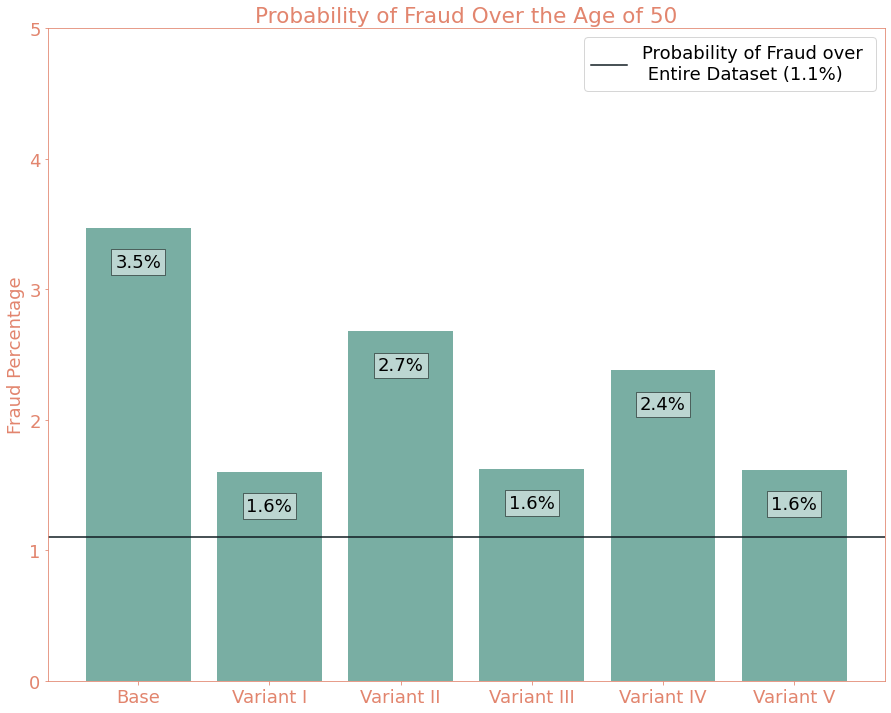

In [112]:
plt.rcParams.update({'font.size': 18})

label = ['Base',
         'Variant I',
         'Variant II',
         'Variant III',
         'Variant IV',
         'Variant V']

height = [base_fraud_over50*100,
          var1_fraud_over50*100,
          var2_fraud_over50*100,
          var3_fraud_over50*100,
          var4_fraud_over50*100,
          var5_fraud_over50*100]

fig, ax = plt.subplots(figsize=(15,12))

plt.bar(x=label, height=height, color='#79AEA3')
plt.axhline(((base.fraud_bool.value_counts()[1]/len(base.fraud_bool))*100), color='#0F1A20')
xlocs, xlabs = plt.xticks()
plt.ylim(top=5)
plt.ylabel('Dataset Variant')
plt.ylabel('Fraud Percentage')
plt.title('Probability of Fraud Over the Age of 50')
ax.xaxis.label.set_color('#E2856E')
ax.yaxis.label.set_color('#E2856E')   
ax.title.set_color('#E2856E')  

ax.tick_params(axis='x', colors='#E2856E')   
ax.tick_params(axis='y', colors='#E2856E') 

ax.spines['left'].set_color('#E2856E')  
ax.spines['right'].set_color('#E2856E')       
ax.spines['top'].set_color('#E2856E')  
ax.spines['bottom'].set_color('#E2856E')  

plt.legend(handles = [Line2D([0], [0],
                             color='#0F1A20',
                             label='Probability of Fraud over \n Entire Dataset (1.1%)')])

for i, j in enumerate(height):
    plt.text(xlocs[i],
             j-0.3,
             ((str(round(j,1)))+'%'),
             ha ='center',
             bbox = dict(facecolor = 'white', alpha = .5))
plt.savefig('../Images/fraud_occurence_over50.png', bbox_inches='tight');    

---

Now, the data needs to be processed into a useable state for modelling. The first step is to seperate out the categorical, binary, and numerical features. To do this, a `categorical_features` list was created to seperate the catorical and binary variables from the numerical features. `numeric_features_base` was also created by dropping the `categorical_features` as well as our target, `fraud_bool`, `device_fraud_count`, as it only has 1 unique value and is therefore useless, and `month`, as the data will be split temporally. X variables for each dataset are then created by concatenating the `numeric_features_base` and `categorical_features`.

In [58]:
base

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,0,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,0,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,0,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,0,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,0,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,-1,104,0,0.030592,-1.044454,AB,804,...,0,200.0,0,INTERNET,8.511502,linux,1,1,0,4
999996,0,0.8,0.322989,148,9,0,1.628119,-1.409803,AC,3306,...,0,200.0,0,INTERNET,8.967865,windows,0,1,0,4
999997,0,0.8,0.879403,-1,30,0,0.018563,34.692760,AA,1522,...,0,200.0,0,INTERNET,8.195531,other,0,1,0,4
999998,0,0.9,0.762112,-1,189,0,0.015352,94.661055,AA,1418,...,0,500.0,0,INTERNET,4.336064,windows,1,1,0,4


In [59]:
categorical_features = [
    'income',
    'payment_type',
    'employment_status',
    'housing_status',
    'source',
    'device_os',
    'device_distinct_emails_8w',
    'customer_age',
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session'
]

In [60]:
numeric_features_base = base.drop(categorical_features, axis=1) \
.drop(['device_fraud_count', 'fraud_bool', 'month'], axis=1)

numeric_features_base.head()

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes
0,0.166828,-1,88,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,185,24,500.0,3.888115
1,0.296286,-1,144,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,259,15,1500.0,31.798819
2,0.044985,-1,132,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,177,-1,200.0,4.728705
3,0.159511,-1,22,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,110,31,200.0,2.047904
4,0.596414,-1,218,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,295,31,1500.0,3.775225


In [62]:
numeric_features_v1 = var1.drop(categorical_features, axis=1) \
.drop(['device_fraud_count', 'fraud_bool', 'month'], axis=1)

numeric_features_v2 = var2.drop(categorical_features, axis=1) \
.drop(['device_fraud_count', 'fraud_bool', 'month'], axis=1)

numeric_features_v3 = var3.drop(categorical_features, axis=1) \
.drop(['device_fraud_count', 'fraud_bool', 'month'], axis=1)

numeric_features_v4 = var4.drop(categorical_features, axis=1) \
.drop(['device_fraud_count', 'fraud_bool', 'month'], axis=1)

numeric_features_v5 = var5.drop(categorical_features, axis=1) \
.drop(['device_fraud_count', 'fraud_bool', 'month'], axis=1)

In [63]:
X_base = pd.concat([numeric_features_base, base[categorical_features]], axis=1)
X_v1 = pd.concat([numeric_features_v1, var1[categorical_features]], axis=1)
X_v2 = pd.concat([numeric_features_v2, var2[categorical_features]], axis=1)
X_v3 = pd.concat([numeric_features_v3, var3[categorical_features]], axis=1)
X_v4 = pd.concat([numeric_features_v4, var4[categorical_features]], axis=1)
X_v5 = pd.concat([numeric_features_v5, var5[categorical_features]], axis=1)

---

The new X DataFrames are then looped over. First, to convert the type of the `categorical_features` to objects, and then, to rename the columns to generic feature names. The DataFrames are then concatenated with the month column from the original DataFrames in order to split the data temporally. Additionally, y DataSeries are created using the `fraud_bool` columns from the initial DataFrames.

In [64]:
X_df = [X_base, X_v1, X_v2, X_v3, X_v4, X_v5]

for X in X_df:
    for feature in (categorical_features):
        X[feature] = X[feature].map(str).astype(object)

In [65]:
for X in X_df:
    i=0
    for column in X:
        X.rename(columns={column:f'feature{i}'}, inplace=True)
        i+=1

X_base = pd.concat([X_base, base.month], axis=1)
X_v1 = pd.concat([X_v1, var1.month], axis=1)
X_v2 = pd.concat([X_v2, var2.month], axis=1)
X_v3 = pd.concat([X_v3, var3.month], axis=1)
X_v4 = pd.concat([X_v4, var4.month], axis=1)
X_v5 = pd.concat([X_v5, var5.month], axis=1)

In [66]:
X_base.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,month
0,0.166828,-1,88,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,...,windows,1,0,0,1,0,0,0,0,7
1,0.296286,-1,144,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,...,windows,1,0,1,0,0,0,0,0,7
2,0.044985,-1,132,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,...,other,1,0,1,0,1,0,0,0,7
3,0.159511,-1,22,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,...,linux,1,0,1,0,1,1,0,0,7
4,0.596414,-1,218,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,...,macintosh,1,0,1,1,0,0,0,1,7


In [67]:
y_base = base.fraud_bool
y_v1 = var1.fraud_bool
y_v2 = var2.fraud_bool
y_v3 = var3.fraud_bool
y_v4 = var4.fraud_bool
y_v5 = var5.fraud_bool

y_base.value_counts()

0    988971
1     11029
Name: fraud_bool, dtype: int64

---

Now that the data has been properly prepared, the data will be split into training data, validation data, and testing data. The training data will consist of the most recent 6 months of the data, as is common in the fraud domian. This data will more accurately represent the data's distribution for model use in the future. The validation data will consist of the data from 6 months ago and the testing data will consist of data from 7 months ago.

In [ ]:
X_train_base = X_base.loc[X_base.month < 6].drop('month', axis=1)
y_train_base = base.fraud_bool.loc[base.month < 6]

X_train_base.shape, y_train_base.shape

In [ ]:
X_train_v1 = X_v1.loc[X_v1.month < 6].drop('month', axis=1)
y_train_v1 = var1.fraud_bool.loc[X_v1.month < 6]

X_train_v1.shape, y_train_v1.shape

In [ ]:
X_train_v2 = X_v2.loc[X_v2.month < 6].drop('month', axis=1)
y_train_v2 = var2.fraud_bool.loc[X_v2.month < 6]

X_train_v2.shape, y_train_v2.shape

In [ ]:
X_train_v3 = X_v3.loc[X_v3.month < 6].drop('month', axis=1)
y_train_v3 = var3.fraud_bool.loc[X_v3.month < 6]

X_train_v3.shape, y_train_v3.shape

In [ ]:
X_train_v4 = X_v4.loc[X_v4.month < 6].drop('month', axis=1)
y_train_v4 = var4.fraud_bool.loc[X_v4.month < 6]

X_train_v4.shape, y_train_v4.shape

In [ ]:
X_train_v5 = X_v5.loc[X_v5.month < 6].drop('month', axis=1)
y_train_v5 = var1.fraud_bool.loc[X_v5.month < 6]

X_train_v5.shape, y_train_v5.shape

In [ ]:
X_val_base = X_base.loc[X_base.month == 6].drop('month', axis=1)
y_val_base = base.fraud_bool.loc[base.month == 6]

X_val_base.shape, y_val_base.shape

In [ ]:
X_val_v1 = X_v1.loc[X_v1.month == 6].drop('month', axis=1)
y_val_v1 = var1.fraud_bool.loc[var1.month == 6]

X_val_v1.shape, y_val_v1.shape

In [ ]:
X_val_v2 = X_v2.loc[X_v2.month == 6].drop('month', axis=1)
y_val_v2 = var2.fraud_bool.loc[var2.month == 6]

X_val_v2.shape, y_val_v2.shape

In [ ]:
X_val_v3 = X_v3.loc[X_v3.month == 6].drop('month', axis=1)
y_val_v3 = var3.fraud_bool.loc[var3.month == 6]

X_val_v3.shape, y_val_v3.shape

In [ ]:
X_val_v4 = X_v4.loc[X_v4.month == 6].drop('month', axis=1)
y_val_v4 = var4.fraud_bool.loc[var4.month == 6]

X_val_v4.shape, y_val_v4.shape

In [ ]:
X_val_v5 = X_v5.loc[X_v5.month == 6].drop('month', axis=1)
y_val_v5 = var5.fraud_bool.loc[var5.month == 6]

X_val_v5.shape, y_val_v5.shape

In [ ]:
X_test_base = X_base.loc[X_base.month == 7].drop('month', axis=1)
y_test_base = base.fraud_bool.loc[base.month == 7]

X_test_base.shape, y_test_base.shape

In [ ]:
X_test_v1 = X_v1.loc[X_v1.month == 7].drop('month', axis=1)
y_test_v1 = var1.fraud_bool.loc[var1.month == 7]

X_test_v1.shape, y_test_v1.shape

In [ ]:
X_test_v2 = X_v2.loc[X_v2.month == 7].drop('month', axis=1)
y_test_v2 = var2.fraud_bool.loc[var2.month == 7]

X_test_v2.shape, y_test_v2.shape

In [ ]:
X_test_v3 = X_v3.loc[X_v3.month == 7].drop('month', axis=1)
y_test_v3 = var3.fraud_bool.loc[var3.month == 7]

X_test_v3.shape, y_test_v3.shape

In [ ]:
X_test_v4 = X_v4.loc[X_v4.month == 7].drop('month', axis=1)
y_test_v4 = var4.fraud_bool.loc[var4.month == 7]

X_test_v4.shape, y_test_v4.shape

In [ ]:
X_test_v5 = X_v5.loc[X_v5.month == 7].drop('month', axis=1)
y_test_v5 = var5.fraud_bool.loc[var5.month == 7]

X_test_v5.shape, y_test_v5.shape

---

In order for this data to be most useful for modelling, it requires preprocessing. This consists of scaling `numerical_data_base` and encoding `categorical_features`. Since we updated the data types of `categorical_features` to objects, we will be able to use a column selector based on object type. StandardScaler and OneHotEncoded are added to a ColumnTransformer and the ColumnTransformer is then utilized to fit and transform the training data and transform the validation and testing data. Once this is completed, the variables are saved off for use in the modelling notebook.

In [573]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[
    ('num_trans', StandardScaler(), selector(dtype_include=np.number)),
    ('cat_trans', OneHotEncoder(sparse=False, handle_unknown='ignore'), selector(dtype_include=object))
],remainder='passthrough')

X_train_base_scaled = preprocessing.fit_transform(X_train_base)
X_val_base_scaled = preprocessing.transform(X_val_base)
X_test_base_scaled = preprocessing.transform(X_test_base)

X_train_v1_scaled = preprocessing.fit_transform(X_train_v1)
X_val_v1_scaled = preprocessing.transform(X_val_v1)
X_test_v1_scaled = preprocessing.transform(X_test_v1)

X_train_v2_scaled = preprocessing.fit_transform(X_train_v2)
X_val_v2_scaled = preprocessing.transform(X_val_v2)
X_test_v2_scaled = preprocessing.transform(X_test_v2)

X_train_v3_scaled = preprocessing.fit_transform(X_train_v3)
X_val_v3_scaled = preprocessing.transform(X_val_v3)
X_test_v3_scaled = preprocessing.transform(X_test_v3)

X_train_v4_scaled = preprocessing.fit_transform(X_train_v4)
X_val_v4_scaled = preprocessing.transform(X_val_v4)
X_test_v4_scaled = preprocessing.transform(X_test_v4)

X_train_v5_scaled = preprocessing.fit_transform(X_train_v5)
X_val_v5_scaled = preprocessing.transform(X_val_v5)
X_test_v5_scaled = preprocessing.transform(X_test_v5)

In [472]:
pd.DataFrame(X_train_base_scaled).to_csv('../Data/base/X_train_base_scaled.csv', index=False)
pd.DataFrame(y_train_base).to_csv('../Data/base/y_train_base.csv', index=False)
pd.DataFrame(X_val_base_scaled).to_csv('../Data/base/X_val_base_scaled.csv', index=False)
pd.DataFrame(y_val_base).to_csv('../Data/base/y_val_base.csv', index=False)
pd.DataFrame(X_test_base_scaled).to_csv('../Data/base/X_test_base_scaled.csv', index=False)
pd.DataFrame(y_test_base).to_csv('../Data/base/y_test_base.csv', index=False)

pd.DataFrame(X_train_v1_scaled).to_csv('../Data/var1/X_train_v1_scaled.csv', index=False)
pd.DataFrame(y_train_v1).to_csv('../Data/var1/y_train_v1.csv', index=False)
pd.DataFrame(X_val_v1_scaled).to_csv('../Data/var1/X_val_v1_scaled.csv', index=False)
pd.DataFrame(y_val_v1).to_csv('../Data/var1/y_val_v1.csv', index=False)
pd.DataFrame(X_test_v1_scaled).to_csv('../Data/var1/X_test_v1_scaled.csv', index=False)
pd.DataFrame(y_test_v1).to_csv('../Data/var1/y_test_v1.csv', index=False)

pd.DataFrame(X_train_v2_scaled).to_csv('../Data/var2/X_train_v2_scaled.csv', index=False)
pd.DataFrame(y_train_v2).to_csv('../Data/var2/y_train_v2.csv', index=False)
pd.DataFrame(X_val_v2_scaled).to_csv('../Data/var2/X_val_v1_scaled.csv', index=False)
pd.DataFrame(y_val_v2).to_csv('../Data/var2/y_val_v2.csv', index=False)
pd.DataFrame(X_test_v2_scaled).to_csv('../Data/var2/X_test_v2_scaled.csv', index=False)
pd.DataFrame(y_test_v2).to_csv('../Data/var2/y_test_v2.csv', index=False)

pd.DataFrame(X_train_v3_scaled).to_csv('../Data/var3/X_train_v3_scaled.csv', index=False)
pd.DataFrame(y_train_v3).to_csv('../Data/var3/y_train_v3.csv', index=False)
pd.DataFrame(X_val_v3_scaled).to_csv('../Data/var3/X_val_v3_scaled.csv', index=False)
pd.DataFrame(y_val_v3).to_csv('../Data/var3/y_val_v3.csv', index=False)
pd.DataFrame(X_test_v3_scaled).to_csv('../Data/var3/X_test_v3_scaled.csv', index=False)
pd.DataFrame(y_test_v3).to_csv('../Data/var3/y_test_v3.csv', index=False)

pd.DataFrame(X_train_v4_scaled).to_csv('../Data/var4/X_train_v4_scaled.csv', index=False)
pd.DataFrame(y_train_v4).to_csv('../Data/var4/y_train_v4.csv', index=False)
pd.DataFrame(X_val_v4_scaled).to_csv('../Data/var4/X_val_v4_scaled.csv', index=False)
pd.DataFrame(y_val_v4).to_csv('../Data/var4/y_val_v4.csv', index=False)
pd.DataFrame(X_test_v4_scaled).to_csv('../Data/var4/X_test_v4_scaled.csv', index=False)
pd.DataFrame(y_test_v4).to_csv('../Data/var4/y_test_v4.csv', index=False)

pd.DataFrame(X_train_v5_scaled).to_csv('../Data/var5/X_train_v5_scaled.csv', index=False)
pd.DataFrame(y_train_v5).to_csv('../Data/var5/y_train_v5.csv', index=False)
pd.DataFrame(X_val_v5_scaled).to_csv('../Data/var5/X_val_v5_scaled.csv', index=False)
pd.DataFrame(y_val_v5).to_csv('../Data/var5/y_val_v5.csv', index=False)
pd.DataFrame(X_test_v5_scaled).to_csv('../Data/var5/X_test_v5_scaled.csv', index=False)
pd.DataFrame(y_test_v5).to_csv('../Data/var5/y_test_v5.csv', index=False)

---

Since the data is very imbalanced, SMOTE will be applied to oversample the minority class. A sampling strategy of 0.25 was chosen to prevent too much oversampling. This was only applied to the training X and y. The resulting new datasets were then saved.

In [473]:
X_train_base_scaled_resampled, y_train_base_resampled = \
SMOTE(random_state=21, sampling_strategy=0.25) \
.fit_resample(X_train_base_scaled,y_train_base)

In [474]:
X_train_v1_scaled_resampled, y_train_v1_resampled = \
SMOTE(random_state=21, sampling_strategy=0.25) \
.fit_resample(X_train_v1_scaled,y_train_v1)

In [475]:
X_train_v2_scaled_resampled, y_train_v2_resampled = \
SMOTE(random_state=21, sampling_strategy=0.25) \
.fit_resample(X_train_v2_scaled,y_train_v2)

In [476]:
X_train_v3_scaled_resampled, y_train_v3_resampled = \
SMOTE(random_state=21, sampling_strategy=0.25) \
.fit_resample(X_train_v3_scaled,y_train_v3)

In [477]:
X_train_v4_scaled_resampled, y_train_v4_resampled = \
SMOTE(random_state=21, sampling_strategy=0.25) \
.fit_resample(X_train_v4_scaled,y_train_v4)

In [478]:
X_train_v5_scaled_resampled, y_train_v5_resampled = \
SMOTE(random_state=21, sampling_strategy=0.25) \
.fit_resample(X_train_v5_scaled,y_train_v5)

In [479]:
pd.DataFrame(X_train_base_scaled_resampled) \
.to_csv('../Data/base/X_train_base_scaled_resampled.csv', index=False)
pd.DataFrame(y_train_base_resampled) \
.to_csv('../Data/base/y_train_base_resampled.csv', index=False)

pd.DataFrame(X_train_v1_scaled_resampled) \
.to_csv('../Data/var1/X_train_v1_scaled_resampled.csv', index=False)
pd.DataFrame(y_train_v1_resampled) \
.to_csv('../Data/var1/y_train_v1_resampled.csv', index=False)

pd.DataFrame(X_train_v2_scaled_resampled) \
.to_csv('../Data/var2/X_train_v2_scaled_resampled.csv', index=False)
pd.DataFrame(y_train_v2_resampled) \
.to_csv('../Data/var2/y_train_v2_resampled.csv', index=False)

pd.DataFrame(X_train_v3_scaled_resampled) \
.to_csv('../Data/var3/X_train_v3_scaled_resampled.csv', index=False)
pd.DataFrame(y_train_v3_resampled) \
.to_csv('../Data/var3/y_train_v3_resampled.csv', index=False)

pd.DataFrame(X_train_v4_scaled_resampled) \
.to_csv('../Data/var4/X_train_v4_scaled_resampled.csv', index=False)
pd.DataFrame(y_train_v4_resampled) \
.to_csv('../Data/var4/y_train_v4_resampled.csv', index=False)

pd.DataFrame(X_train_v5_scaled_resampled) \
.to_csv('../Data/var5/X_train_v5_scaled_resampled.csv', index=False)
pd.DataFrame(y_train_v5_resampled) \
.to_csv('../Data/var5/y_train_v5_resampled.csv', index=False)

In [21]:
y_train_base_resampled.value_counts()

0    786838
1    196709
Name: fraud_bool, dtype: int64

---

Now that the base datasets have been completed, some feature engineering is worth testing. The first feature engineering was creating crosses for each features (a cross is one feature multiplied by another). To begin this process, the numeric features are looped over to create the new `cross_numeric_features`. These are then concatenated with `numeric_features` and then concatenated with `categorical_features` in order to create the new `X_base_cross` DataFrame. The same process of renaming features generically and then splitting temporally was conducted. Finally, `preprocessing` and SMOTE are applied and the relevant new datasets are saved.

In [482]:
cross_numeric_features = pd.DataFrame(np.zeros([len(X_base), ]), columns=["0"])

for feature in numeric_features:
    for second_feature in numeric_features:
        feature_name = feature + "/" + second_feature
        if feature_name not in numeric_features.columns:
            cross_numeric_features[feature_name] =\
            numeric_features[feature] * numeric_features[second_feature]

In [483]:
cross_features = pd.concat([numeric_features,
                           cross_numeric_features.drop('0',
                                                       axis=1)],
                           axis=1)

In [484]:
X_base_cross = pd.concat([cross_features,
                          base[categorical_features]],
                         axis=1)

In [485]:
i=0
for column in X_base_cross:
    X_base_cross.rename(columns={column:f'feature{i}'}, inplace=True)
    i+=1
    
X_base_cross = pd.concat([X_base_cross, base.month], axis=1)

X_base_cross.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,month
0,0.252681,-1,188,0.021614,-0.266603,2596,11237.202503,4522.028511,4215.610331,4,...,1,0,0.9,AA,CA,BA,INTERNET,windows,1,7
1,0.185206,-1,51,0.001696,-1.191015,898,6811.421858,3878.781490,4384.991179,12,...,0,0,0.9,AB,CA,BA,INTERNET,windows,1,7
2,0.505509,-1,187,0.011880,-1.252679,2851,8425.498770,5362.654842,4272.042200,36,...,0,1,0.9,AC,CB,BA,INTERNET,other,1,7
3,0.612030,-1,55,0.001582,-3.001035,4035,8513.696191,6421.338995,5303.513782,514,...,0,0,0.9,AB,CA,BA,INTERNET,linux,1,7
4,0.592596,319,68,0.011189,-0.729188,1611,4226.142238,4815.461860,4251.515397,558,...,1,0,0.9,AB,CA,BA,INTERNET,macintosh,1,7


In [486]:
Xc_train_base = X_base_cross.loc[X_base_cross.month < 6].drop('month', axis=1)

Xc_train_base.shape

(794989, 254)

In [487]:
Xc_val_base = X_base_cross.loc[X_base_cross.month == 6].drop('month', axis=1)

Xc_val_base.shape

(108168, 254)

In [488]:
Xc_test_base = X_base_cross.loc[X_base_cross.month == 7].drop('month', axis=1)

Xc_test_base.shape

(96843, 254)

In [489]:
Xc_train_base_scaled = preprocessing.fit_transform(Xc_train_base)
Xc_val_base_scaled = preprocessing.transform(Xc_val_base)
Xc_test_base_scaled = preprocessing.transform(Xc_test_base)

In [490]:
pd.DataFrame(Xc_train_base_scaled).to_csv('Data/base/Xc_train_base_scaled.csv', index=False)
pd.DataFrame(Xc_val_base_scaled).to_csv('Data/base/Xc_val_base_scaled.csv', index=False)
pd.DataFrame(Xc_test_base_scaled).to_csv('Data/base/Xc_test_base_scaled.csv', index=False)

In [491]:
Xc_train_base_scaled_resampled, y_train_base_resampled = \
SMOTE(random_state=21,sampling_strategy=0.25) \
.fit_resample(Xc_train_base_scaled,y_train_base)

In [492]:
pd.DataFrame(Xc_train_base_scaled_resampled) \
.to_csv('Data/base/Xc_train_base_scaled_resampled.csv', index=False)

---

This same process from above was then applied to Polynomial features with degree 3.

In [569]:
pf = PolynomialFeatures(3)

numeric_features_poly = pd.DataFrame(pf.fit_transform(numeric_features_base))

numeric_features_poly.head()

,0,1,2,3,4,5,6,7,8,9,...,806,807,808,809,810,811,812,813,814,815
0,1.0,0.166828,-1.0,88.0,0.020925,-1.331345,769.0,10650.765523,3134.319630,3863.647740,...,13824.0,288000.0,2239.554012,6000000.0,46657.375257,362.818444,1.250000e+08,9.720287e+05,7.558718e+03,58.778321
1,1.0,0.296286,-1.0,144.0,0.005418,-0.816224,366.0,534.047319,2670.918292,3124.298166,...,3375.0,337500.0,7154.734357,33750000.0,715473.435682,15167.473694,3.375000e+09,7.154734e+07,1.516747e+06,32153.850413
2,1.0,0.044985,-1.0,132.0,3.108549,-0.755728,870.0,4048.534263,2893.621498,3159.590679,...,-1.0,200.0,4.728705,-40000.0,-945.740973,-22.360650,8.000000e+06,1.891482e+05,4.472130e+03,105.736913
3,1.0,0.159511,-1.0,22.0,0.019079,-1.205124,810.0,3457.064063,4054.908412,3022.261812,...,29791.0,192200.0,1968.036150,1240000.0,12697.007416,130.011288,8.000000e+06,8.191618e+04,8.387825e+02,8.588732
4,1.0,0.596414,-1.0,218.0,0.004441,-0.773276,890.0,5020.341679,2728.237159,3087.670952,...,29791.0,1441500.0,3627.991177,69750000.0,175547.960170,441.822026,3.375000e+09,8.494256e+06,2.137849e+04,53.805727


In [571]:
X_base_poly = pd.concat([numeric_features_poly, 
                        base[categorical_features]],
                       axis=1)

In [572]:
i=0
for column in X_base_poly:
    X_base_poly.rename(columns={column:f'feature{i}'}, inplace=True)
    i+=1
    
X_base_poly = pd.concat([X_base_poly, base.month], axis=1)

X_base_poly.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature821,feature822,feature823,feature824,feature825,feature826,feature827,feature828,feature829,month
0,1.0,0.166828,-1.0,88.0,0.020925,-1.331345,769.0,10650.765523,3134.319630,3863.647740,...,1,0,0.9,AA,CA,BA,INTERNET,windows,1,7
1,1.0,0.296286,-1.0,144.0,0.005418,-0.816224,366.0,534.047319,2670.918292,3124.298166,...,0,0,0.9,AB,CA,BA,INTERNET,windows,1,7
2,1.0,0.044985,-1.0,132.0,3.108549,-0.755728,870.0,4048.534263,2893.621498,3159.590679,...,0,1,0.9,AC,CB,BA,INTERNET,other,1,7
3,1.0,0.159511,-1.0,22.0,0.019079,-1.205124,810.0,3457.064063,4054.908412,3022.261812,...,0,0,0.9,AB,CA,BA,INTERNET,linux,1,7
4,1.0,0.596414,-1.0,218.0,0.004441,-0.773276,890.0,5020.341679,2728.237159,3087.670952,...,1,0,0.9,AB,CA,BA,INTERNET,macintosh,1,7


In [574]:
X_train_base_poly = X_base_poly.loc[X_base_poly.month < 6].drop('month', axis=1)

X_train_base_poly.shape

(794989, 830)

In [575]:
X_val_base_poly = X_base_poly.loc[X_base_poly.month == 6].drop('month', axis=1)

X_val_base_poly.shape

(108168, 830)

In [576]:
X_test_base_poly = X_base_poly.loc[X_base_poly.month == 7].drop('month', axis=1)

X_test_base_poly.shape

(96843, 830)

In [577]:
X_train_base_poly_scaled = preprocessing.fit_transform(X_train_base_poly)
X_val_base_poly_scaled = preprocessing.transform(X_val_base_poly)
X_test_base_poly_scaled = preprocessing.transform(X_test_base_poly)

In [579]:
pd.DataFrame(X_train_base_poly_scaled) \
.to_csv('Data/base/X_train_base_poly_scaled.csv', index=False)
pd.DataFrame(X_val_base_poly_scaled) \
.to_csv('Data/base/X_val_base_poly_scaled.csv', index=False)
pd.DataFrame(X_test_base_poly_scaled) \
.to_csv('Data/base/X_test_base_poly_scaled.csv', index=False)

In [580]:
X_train_base_poly_scaled_resampled, y_train_base_resampled = \
SMOTE(random_state=21, sampling_strategy=0.25) \
.fit_resample(X_train_base_poly_scaled,y_train_base)

In [581]:
pd.DataFrame(X_train_base_poly_scaled_resampled) \
.to_csv('Data/base/X_train_base_poly_scaled_resampled.csv', index=False)

---

Now, the data is prepared for basic EDA and data modelling.

---